In [1]:
from novel_swarms.novelty.NoveltyArchive import NoveltyArchive
from novel_swarms.world.simulate import main as sim
from src.constants import SINGLE_SENSOR_HETEROGENEOUS_WORLD_CONFIG_AWARE

archive = NoveltyArchive(
    # pheno_file="/home/connor/Downloads/MRS_RESULTS/s2/NS5/NS5_s2_t1686786658_b__1686828354.csv",
    # geno_file="/home/connor/Downloads/MRS_RESULTS/s2/NS5/NS5_s2_t1686786658_g__1686828354.csv",
    pheno_file="/home/connor/Downloads/MRS_RESULTS/s1/NS5/NS5_s1_t1686745687_b__1686786653.csv",
    geno_file="/home/connor/Downloads/MRS_RESULTS/s1/NS5/NS5_s1_t1686745687_g__1686786653.csv",
    absolute=True
)
proxy_archive = NoveltyArchive()

world_config = SINGLE_SENSOR_HETEROGENEOUS_WORLD_CONFIG_AWARE
world_config.population_size = 24
world_config.seed = 1

GENERATIONS = 100
START_AT_GEN = 23
for i in range(len(archive.archive)):
    behavior, genome = archive.archive[i], archive.genotypes[i]
    proxy_archive.addToArchive(behavior, genome)
    if i > 0 and i % GENERATIONS == 0:
        print(f"GENERATION: {i // GENERATIONS}")
        novelty_scores = []
        for j in range(GENERATIONS):
            novelty_scores.append((proxy_archive.getNovelty(15, proxy_archive.archive[-j]), len(proxy_archive.archive) - j - 1))
        novelty_scores.sort()
        print("Most Novel Scores Calculated!")
        print(novelty_scores[-3:])
        print("Ask the human about the following genomes...")

        queries = [archive.genotypes[score[1]] for score in novelty_scores[-3:]]
        if i // GENERATIONS < START_AT_GEN:
            continue
        for query in queries:
            world_config.population_size = 24
            world_config.agentConfig.from_n_species_controller(query)
            world_config.agentConfig.attach_world_config(world_config)
            sim(SINGLE_SENSOR_HETEROGENEOUS_WORLD_CONFIG_AWARE, step_size=8)


pygame-ce 2.2.1 (SDL 2.26.4, Python 3.10.6)
GENERATION: 1
Most Novel Scores Calculated!
[(1.6027815430585655, 41), (1.9857177182749448, 56), (2.0586181942267308, 44)]
Ask the human about the following genomes...
GENERATION: 2
Most Novel Scores Calculated!
[(1.3695151960429532, 184), (1.3765408249589066, 123), (1.3771595334839501, 108)]
Ask the human about the following genomes...
GENERATION: 3
Most Novel Scores Calculated!
[(1.5659579837834532, 278), (1.7230820284758182, 217), (4.043418885827719, 296)]
Ask the human about the following genomes...
GENERATION: 4
Most Novel Scores Calculated!
[(1.5951986554842696, 350), (1.6724842598374396, 305), (1.7897334192887366, 324)]
Ask the human about the following genomes...
GENERATION: 5
Most Novel Scores Calculated!
[(1.5277827521880682, 449), (1.7341756765316056, 465), (1.9333911073834338, 414)]
Ask the human about the following genomes...
GENERATION: 6
Most Novel Scores Calculated!
[(1.4843069021257114, 570), (1.52679229306013, 522), (1.75104

KeyboardInterrupt: 

HIL Final: 16.666666666666668
SC Final: 13.0


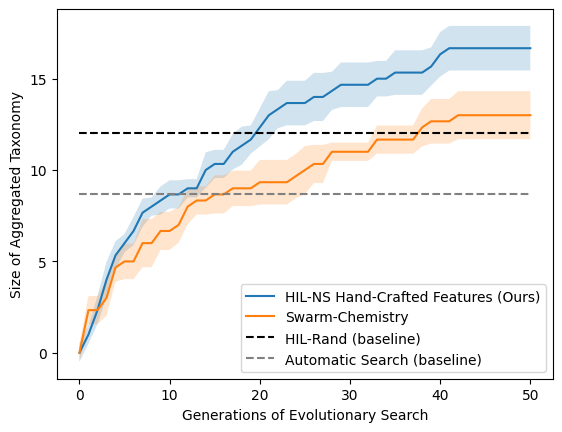

In [14]:
import matplotlib.pyplot as plt
import numpy as np

# X-Axis
x = [i for i in range(0, 51, 1)]

# HIL-NS
y_HIL_0 = [0, 1, 3, 5, 5, 6, 6, 7, 8, 9, 9, 9, 9, 9, 11, 11, 11, 12, 12, 12, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
y_HIL_1 = [0, 1, 2, 4, 6, 6, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 12, 12, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17] + ([18] * 11)
y_HIL_2 = [0, 1, 2, 3, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11] + ([12] * 6) + ([13] * 5) + ([14] * 6) + [15, 16] + ([17] * 10)

y_HIL_All = np.concatenate((np.expand_dims(np.array(y_HIL_0), axis=0), np.expand_dims(np.array(y_HIL_1), axis=0), np.expand_dims(np.array(y_HIL_2), axis=0)))
y_HIL_Avg = np.average(y_HIL_All, axis=0)
y_HIL_Err = 1.0 * ((np.std(y_HIL_All, axis=0) / np.sqrt(3)) + 0.5)
print(f"HIL Final: {y_HIL_Avg[-1]}")

# Swarm Chemistry
y_SC_0 = [0, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 10, 11, 11, 11, 11, 11, 11, 11, 11, 12, 12, 12, 12, 12, 13, 13, 13, 13, 14, 14, 14, 14, 14, 14, 14, 14, 14]
y_SC_1 = [0, 2,2,2, 4,4,4, 5,5, 6, 6, 7]  + ([8] * 14) + [9, 9] + ([11] * 23)
y_SC_2 = [0, 2, 2, 3, 5, 6, 6, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10] + ([11] * 13) + ([12] * 5) + [13] + ([14] * 12)

y_SC_All = np.concatenate((np.expand_dims(np.array(y_SC_0), axis=0), np.expand_dims(np.array(y_SC_1), axis=0), np.expand_dims(np.array(y_SC_2), axis=0)))
y_SC_Avg = np.average(y_SC_All, axis=0)
y_SC_Err = 1.0 * ((np.std(y_SC_All , axis=0) / np.sqrt(3)) + 0.5)
print(f"SC Final: {y_SC_Avg[-1]}")

y_3 = [8.67 for i in range(0, 51, 1)]
y_4 = [12 for i in range(0, 51, 1)]

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("Generations of Evolutionary Search")
plt.ylabel("Size of Aggregated Taxonomy")
# plt.title("Number of Distinct Behaviors Discovered by HIL-NS and Swarm Chemistry")
plt.plot(x, y_HIL_Avg, label="HIL-NS Hand-Crafted Features (Ours)")
plt.fill_between(x, y_HIL_Avg - y_HIL_Err, y_HIL_Avg + y_HIL_Err, alpha=0.2)

plt.plot(x, y_SC_Avg, label="Swarm-Chemistry")
plt.fill_between(x, y_SC_Avg - y_SC_Err, y_SC_Avg + y_SC_Err, alpha=0.2)

# plt.plot(x, y_2, label="Type-Aware Latent Embedding")
plt.plot(x, y_4, 'k--', label="HIL-Rand (baseline)")
plt.plot(x, y_3, '--', color="grey", label="Automatic Search (baseline)")

plt.legend()
plt.show()

HIL Final: 16.666666666666668
SC Final: 13.333333333333334


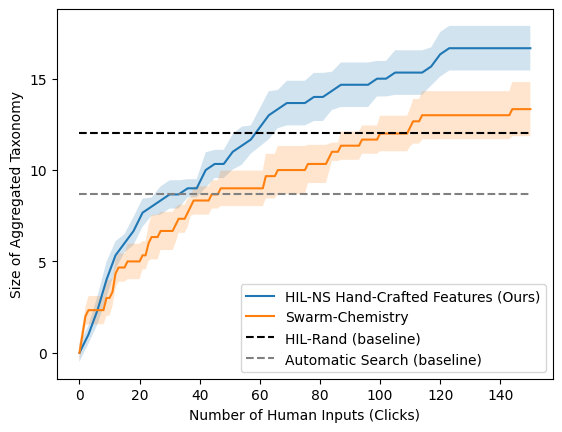

In [15]:
import matplotlib.pyplot as plt

x = [i for i in range(0, 151, 3)]
x_2 = [i for i in range(0, 151, 1)]
y_HIL_0 = [0, 1, 3, 5, 5, 6, 6, 7, 8, 9, 9, 9, 9, 9, 11, 11, 11, 12, 12, 12, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
y_HIL_1 = [0, 1, 2, 4, 6, 6, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 12, 12, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17] + ([18] * 11)
y_HIL_2 = [0, 1, 2, 3, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11] + ([12] * 6) + ([13] * 5) + ([14] * 6) + [15, 16] + ([17] * 10)

y_HIL_All = np.concatenate((np.expand_dims(np.array(y_HIL_0), axis=0), np.expand_dims(np.array(y_HIL_1), axis=0), np.expand_dims(np.array(y_HIL_2), axis=0)))
y_HIL_Avg = np.average(y_HIL_All, axis=0)
y_HIL_Err = 1.0 * ((np.std(y_HIL_All, axis=0) / np.sqrt(3)) + 0.5)
print(f"HIL Final: {y_HIL_Avg[-1]}")

y_SC_0 = [0, 1, 2, 3, 3, 3, 3, 3, 3, 4, 4, 4, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 6, 6, 6, 6, 6, 6, 6, 6, 6, 7, 7, 7, 7, 8, 8, 8, 8, 8, 8, 8, 8, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 9, 10, 10, 10, 10] + ([11] * 21) + ([12] * 13) + ([13] * 11) + ([14] * 33) + ([15] * 7)
y_SC_1 = [0, 1] + ([2] * 9) + [3] + ([4] * 9) + ([5] * 6) + ([6] * 6) + ([7] * 4) + ([8] * 39) + ([9] * 7) + [10] + ([11] * 67)
y_SC_2 = [0, 1] + ([2] * 7) + ([3] * 3) + ([4] * 1) + ([5] * 3) + ([6] * 7) + ([7] * 1) + ([8] * 14) + ([9] * 9) + ([10] * 15) + ([11] * 32) + ([12] * 16) + ([13] * 4) + ([14] * 37)

y_SC_All = np.concatenate((np.expand_dims(np.array(y_SC_0), axis=0), np.expand_dims(np.array(y_SC_1), axis=0), np.expand_dims(np.array(y_SC_2), axis=0)))
y_SC_Avg = np.average(y_SC_All, axis=0)
y_SC_Err = 1.0 * ((np.std(y_SC_All , axis=0) / np.sqrt(3)) + 0.5)
print(f"SC Final: {y_SC_Avg[-1]}")

y_3 = [8.67 for i in range(0, 51, 1)]
y_4 = [12 for i in range(0, 51, 1)]

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("Number of Human Inputs (Clicks)")
plt.ylabel("Size of Aggregated Taxonomy")
# plt.title("Number of Distinct Behaviors Discovered by HIL-NS and Swarm Chemistry")
plt.plot(x, y_HIL_Avg, label="HIL-NS Hand-Crafted Features (Ours)")
plt.fill_between(x, y_HIL_Avg - y_HIL_Err, y_HIL_Avg + y_HIL_Err, alpha=0.2)

plt.plot(x_2, y_SC_Avg, label="Swarm-Chemistry")
plt.fill_between(x_2, y_SC_Avg - y_SC_Err, y_SC_Avg + y_SC_Err, alpha=0.2)

# plt.plot(x, y_2, label="Type-Aware Latent Embedding")
plt.plot(x, y_4, 'k--', label="HIL-Rand (baseline)")
plt.plot(x, y_3, '--', color="grey", label="Automatic Search (baseline)")

plt.legend()
plt.show()

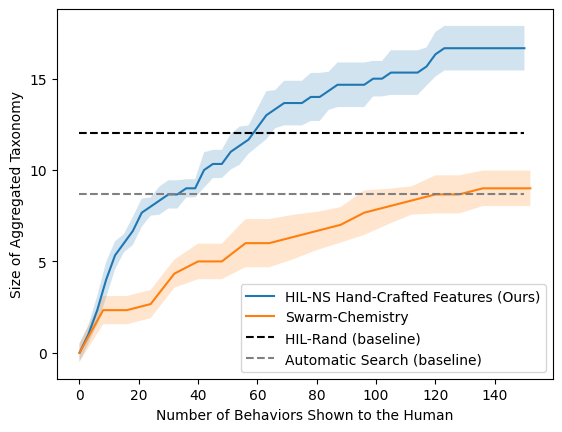

In [12]:
import matplotlib.pyplot as plt

x = [i for i in range(0, 151, 3)]
x_2 = [i for i in range(0, 156, 8)]
y_HIL_0 = [0, 1, 3, 5, 5, 6, 6, 7, 8, 9, 9, 9, 9, 9, 11, 11, 11, 12, 12, 12, 13, 14, 14, 14, 14, 14, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15, 15]
y_HIL_1 = [0, 1, 2, 4, 6, 6, 7, 8, 8, 8, 9, 9, 9, 9, 10, 10, 10, 11, 12, 12, 13, 14, 14, 15, 15, 15, 15, 15, 15, 16, 16, 16, 16, 16, 16, 17, 17, 17, 17, 17] + ([18] * 11)
y_HIL_2 = [0, 1, 2, 3, 5, 6, 7, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 11, 11, 11] + ([12] * 6) + ([13] * 5) + ([14] * 6) + [15, 16] + ([17] * 10)

y_HIL_All = np.concatenate((np.expand_dims(np.array(y_HIL_0), axis=0), np.expand_dims(np.array(y_HIL_1), axis=0), np.expand_dims(np.array(y_HIL_2), axis=0)))
y_HIL_Avg = np.average(y_HIL_All, axis=0)
y_HIL_Err = 1.0 * ((np.std(y_HIL_All, axis=0) / np.sqrt(3)) + 0.5)


y_SC_0 = [0, 3, 3, 3, 4, 5, 5, 5, 5, 5, 6, 6, 6, 7, 8, 8, 8, 9, 9, 9]
y_SC_1 = [0, 2, 2, 2, 4, 4, 4, 5, 5, 6, 6, 7, 8, 8, 8, 8, 8, 8, 8, 8]
y_SC_2 = [0, 2, 2, 3, 5, 6, 6, 8, 8, 8, 8, 8, 9, 9, 9, 10, 10, 10, 10, 10]

y_SC_All = np.concatenate((np.expand_dims(np.array(y_SC_0), axis=0), np.expand_dims(np.array(y_SC_1), axis=0), np.expand_dims(np.array(y_SC_2), axis=0)))
y_SC_Avg = np.average(y_SC_All, axis=0)
y_SC_Err = 1.0 * ((np.std(y_SC_All , axis=0) / np.sqrt(3)) + 0.5)

y_3 = [8.67 for i in range(0, 51, 1)]
y_4 = [12 for i in range(0, 51, 1)]

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("Number of Behaviors Shown to the Human")
plt.ylabel("Size of Aggregated Taxonomy")
# plt.title("Number of Distinct Behaviors Discovered by HIL-NS and Swarm Chemistry")
plt.plot(x, y_HIL_Avg, label="HIL-NS Hand-Crafted Features (Ours)")
plt.fill_between(x, y_HIL_Avg - y_HIL_Err, y_HIL_Avg + y_HIL_Err, alpha=0.2)

plt.plot(x_2, y_SC_Avg, label="Swarm-Chemistry")
plt.fill_between(x_2, y_SC_Avg - y_SC_Err, y_SC_Avg + y_SC_Err, alpha=0.2)

# plt.plot(x, y_2, label="Type-Aware Latent Embedding")
plt.plot(x, y_4, 'k--', label="HIL-Rand (baseline)")
plt.plot(x, y_3, '--', color="grey", label="Automatic Search (baseline)")

plt.legend()
plt.show()

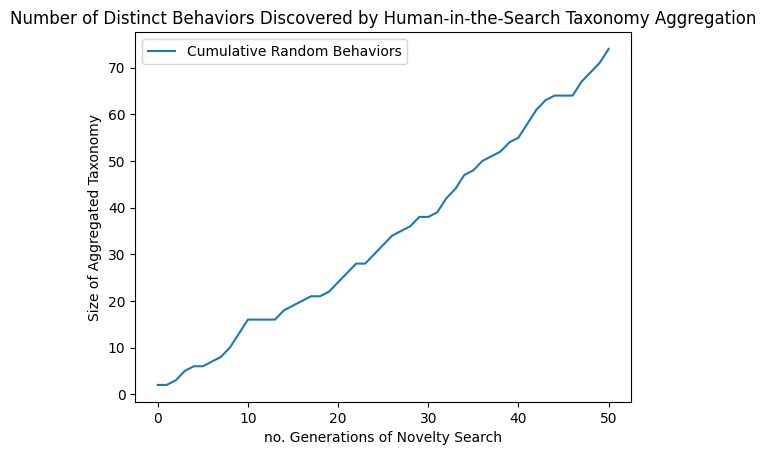

In [41]:
import matplotlib.pyplot as plt

x = [i for i in range(0, 51, 1)]
y = [2, 2, 3, 5, 6, 6, 7, 8, 10, 13, 16, 16, 16, 16, 18, 19, 20, 21, 21, 22, 24, 26, 28, 28, 30, 32, 34, 35, 36, 38, 38, 39, 42, 44, 47, 48, 50, 51, 52, 54, 55, 58, 61, 63, 64, 64, 64, 67, 69, 71, 74]

plt.locator_params(axis="both", integer=True, tight=True)
plt.xlabel("no. Generations of Novelty Search")
plt.ylabel("Size of Aggregated Taxonomy")
plt.title("Number of Distinct Behaviors Discovered by Human-in-the-Search Taxonomy Aggregation")
plt.plot(x, y, label="Cumulative Random Behaviors")

plt.legend()
plt.show()